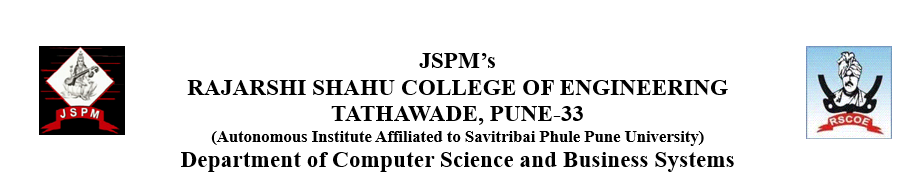

### Name: Bhargavi Satish Bhende

### PRN No.: RBT21CB053

# Problem statement:
A-priori algorithm of all supervised learning (SVM, NB, DT, KNN, ANN)

#**Association Rule Mining**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong rules discovered in transaction data using measures of interestingness, based on the concept of strong rules.

#**Apriori Algorithm**

Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases.

It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database.

The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

In [ ]:
#import libraries
import numpy as np
import pandas as pd

In [ ]:
#Reading data
df=pd.read_csv("Groceries_dataset.csv")
#Show first five rows in dataset
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


##Exploring dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

##Data Statistics

In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
#Find NAN values
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
#Find duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38760    False
38761    False
38762    False
38763    False
38764    False
Length: 38765, dtype: bool

In [ ]:
df.columns.values

array(['Member_number', 'Date', 'itemDescription'], dtype=object)

In [ ]:
df.drop_duplicates(subset=None, keep=False, inplace=True)

In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.dropna()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df.shape

(37274, 3)

In [ ]:
#Convert string data to numeric data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Date'] = encoder.fit_transform(df['Date'])
Date  = {index : label for index, label in enumerate(encoder.classes_)}
Date

{0: '01-01-2014',
 1: '01-01-2015',
 2: '01-02-2014',
 3: '01-02-2015',
 4: '01-03-2014',
 5: '01-03-2015',
 6: '01-04-2014',
 7: '01-04-2015',
 8: '01-05-2014',
 9: '01-05-2015',
 10: '01-06-2014',
 11: '01-06-2015',
 12: '01-07-2014',
 13: '01-07-2015',
 14: '01-08-2014',
 15: '01-08-2015',
 16: '01-09-2014',
 17: '01-09-2015',
 18: '01-10-2014',
 19: '01-10-2015',
 20: '01-11-2014',
 21: '01-11-2015',
 22: '01-12-2014',
 23: '01-12-2015',
 24: '02-01-2014',
 25: '02-01-2015',
 26: '02-02-2014',
 27: '02-02-2015',
 28: '02-03-2014',
 29: '02-03-2015',
 30: '02-04-2014',
 31: '02-04-2015',
 32: '02-05-2014',
 33: '02-05-2015',
 34: '02-06-2014',
 35: '02-06-2015',
 36: '02-07-2014',
 37: '02-07-2015',
 38: '02-08-2014',
 39: '02-08-2015',
 40: '02-09-2014',
 41: '02-09-2015',
 42: '02-10-2014',
 43: '02-10-2015',
 44: '02-11-2014',
 45: '02-11-2015',
 46: '02-12-2014',
 47: '02-12-2015',
 48: '03-01-2014',
 49: '03-01-2015',
 50: '03-02-2014',
 51: '03-02-2015',
 52: '03-03-2014',
 53

In [ ]:
df['itemDescription'] = encoder.fit_transform(df['itemDescription'])
itemDescription  = {index : label for index, label in enumerate(encoder.classes_)}
itemDescription

{0: 'Instant food products',
 1: 'UHT-milk',
 2: 'abrasive cleaner',
 3: 'artif. sweetener',
 4: 'baby cosmetics',
 5: 'bags',
 6: 'baking powder',
 7: 'bathroom cleaner',
 8: 'beef',
 9: 'berries',
 10: 'beverages',
 11: 'bottled beer',
 12: 'bottled water',
 13: 'brandy',
 14: 'brown bread',
 15: 'butter',
 16: 'butter milk',
 17: 'cake bar',
 18: 'candles',
 19: 'candy',
 20: 'canned beer',
 21: 'canned fish',
 22: 'canned fruit',
 23: 'canned vegetables',
 24: 'cat food',
 25: 'cereals',
 26: 'chewing gum',
 27: 'chicken',
 28: 'chocolate',
 29: 'chocolate marshmallow',
 30: 'citrus fruit',
 31: 'cleaner',
 32: 'cling film/bags',
 33: 'cocoa drinks',
 34: 'coffee',
 35: 'condensed milk',
 36: 'cooking chocolate',
 37: 'cookware',
 38: 'cream',
 39: 'cream cheese ',
 40: 'curd',
 41: 'curd cheese',
 42: 'decalcifier',
 43: 'dental care',
 44: 'dessert',
 45: 'detergent',
 46: 'dish cleaner',
 47: 'dishes',
 48: 'dog food',
 49: 'domestic eggs',
 50: 'female sanitary products',
 51: 

In [ ]:
df['itemDescription'].value_counts()

164    2232
102    1760
122    1580
138    1394
165    1238
       ... 
155       5
5         4
4         3
79        1
114       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
df['Date'].value_counts()

481    96
493    89
183    88
662    86
709    85
       ..
84     24
389    23
17     22
216    22
365    21
Name: Date, Length: 728, dtype: int64

In [ ]:
df['Member_number'].value_counts()

3180    34
3737    33
3050    31
2051    29
2394    29
        ..
1701     2
2417     2
4454     1
3197     1
1439     1
Name: Member_number, Length: 3892, dtype: int64

In [ ]:
#grouping dataset to form a list of products bought by same customer on same date
df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [ ]:
df.head()

Member_number  Date
1000           341     [130, 164, 132, 165]
               562          [164, 105, 128]
               565                 [20, 92]
               597                [130, 73]
               633               [138, 108]
Name: itemDescription, dtype: object

In [ ]:
#apriori takes list as an input, after that converting dtaset to a list
transactions = df.values.tolist()
transactions[:10]

[[130, 164, 132, 165],
 [164, 105, 128],
 [20, 92],
 [130, 73],
 [138, 108],
 [56, 40],
 [130, 164, 122],
 [164, 138],
 [8, 162],
 [56, 138, 160]]

##Apriori Algorithm

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=2bd6a06609dba6874f75882a5700e671c2bfffaf9f10aab2ad5da762ed83c1f3
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori
rules = apriori(transactions, min_support=0.00030,min_confidence = 0.05,min_lift = 2,min_length = 2)
results = list(rules)
results

[RelationRecord(items=frozenset({138, 3}), support=0.00047435115538388563, ordered_statistics=[OrderedStatistic(items_base=frozenset({3}), items_add=frozenset({138}), confidence=0.2413793103448276, lift=2.5552614653935586)]),
 RelationRecord(items=frozenset({9, 35}), support=0.0003388222538456326, ordered_statistics=[OrderedStatistic(items_base=frozenset({35}), items_add=frozenset({9}), confidence=0.05102040816326531, lift=2.316640502354788)]),
 RelationRecord(items=frozenset({151, 15}), support=0.0003388222538456326, ordered_statistics=[OrderedStatistic(items_base=frozenset({151}), items_add=frozenset({15}), confidence=0.07462686567164178, lift=2.117824339839265)]),
 RelationRecord(items=frozenset({20, 84}), support=0.0004065867046147591, ordered_statistics=[OrderedStatistic(items_base=frozenset({84}), items_add=frozenset({20}), confidence=0.12, lift=2.57764192139738)]),
 RelationRecord(items=frozenset({59, 28}), support=0.0004065867046147591, ordered_statistics=[OrderedStatistic(item

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence','Lift'] )

##Result Algorithm

In [ ]:
ordered_results

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,3,138,0.000474,0.241379,2.555261
1,35,9,0.000339,0.051020,2.316641
2,151,15,0.000339,0.074627,2.117824
3,84,20,0.000407,0.120000,2.577642
4,59,28,0.000407,0.058824,2.487275
...,...,...,...,...,...
76,160,165,0.000610,0.214286,2.554293
77,130,138,0.000610,0.191489,2.027122
78,130,165,0.000407,0.230769,2.750777
79,138,130,0.000678,0.121951,2.038091


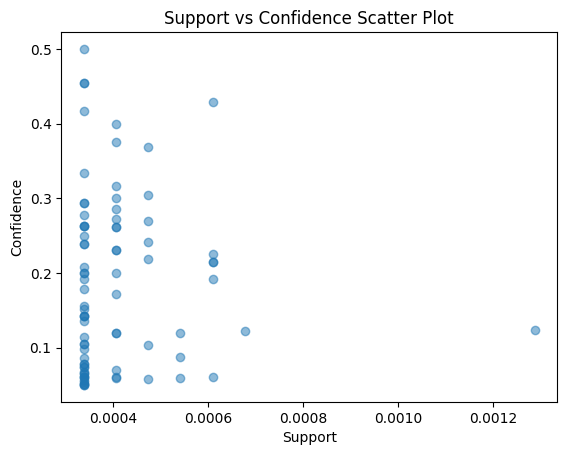

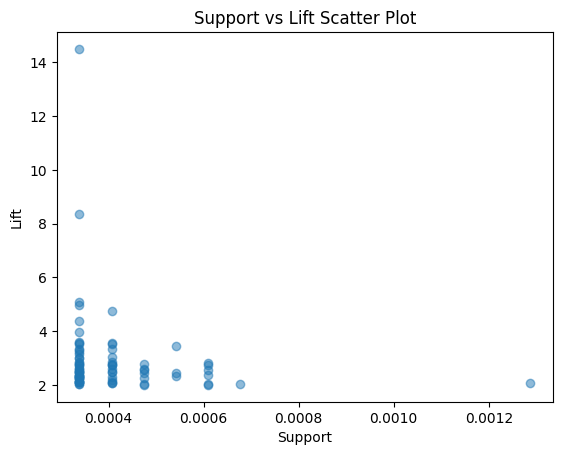

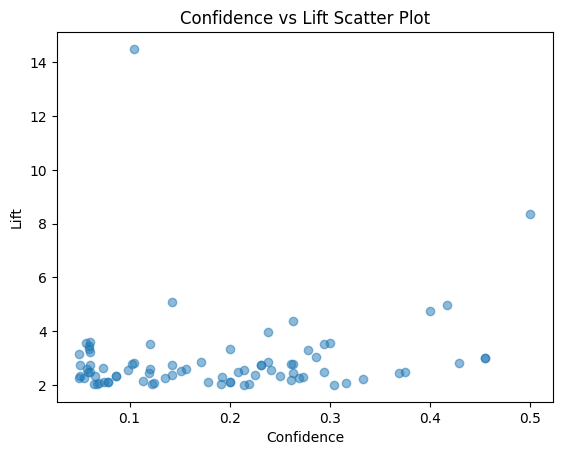

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for Support vs Confidence
plt.scatter(ordered_results['Support'], ordered_results['Confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatter Plot')
plt.show()

# Scatter plot for Support vs Lift
plt.scatter(ordered_results['Support'], ordered_results['Lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift Scatter Plot')
plt.show()

# Scatter plot for Confidence vs Lift
plt.scatter(ordered_results['Confidence'], ordered_results['Lift'], alpha=0.5)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift Scatter Plot')
plt.show()


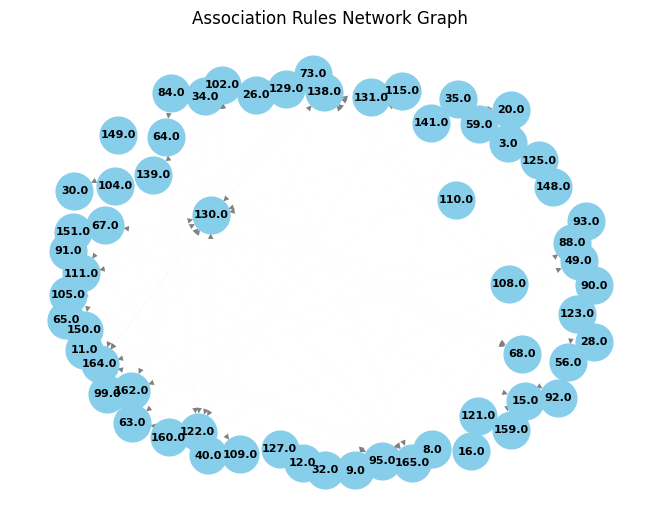

In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on association rules
for row in ordered_results.iterrows():
    G.add_edge(row[1]['Left Hand Side'], row[1]['Right Hand Side'], weight=row[1]['Support'])

# Draw the network graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed
nx.draw(G, pos, with_labels=True, font_size=8, node_size=700, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', width=[i['weight']*10 for u, v, i in G.edges(data=True)])
plt.title('Association Rules Network Graph')
plt.show()
